In [1]:
# import standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
#loading the data and read the data using pandas
data=pd.read_csv('/home/vinod/Downloads/AgrcultureDataset.csv')
data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165


In [3]:
#analysis the data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     246091 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 13.1+ MB


In [4]:
#analysis the statistic in the data
data.describe().style.background_gradient(cmap='RdYlBu')

,Crop_Year,Area
count,246091.000000,246091.000000
mean,2005.643018,12002.820864
std,4.952164,50523.404019
min,1997.000000,0.040000
25%,2002.000000,80.000000
50%,2006.000000,582.000000
75%,2010.000000,4392.000000
max,2015.000000,8580100.000000


# Explore data analysis using the matplotlib and seaborn

In [5]:
# data column
data.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

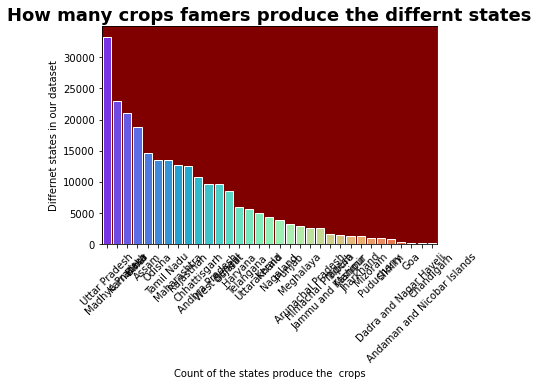

In [6]:
# to visualization the states in our dataset
states=data['State_Name'].value_counts()
ax=plt.axes()
ax.set(facecolor='maroon')
sns.set(rc={'figure.figsize':(17,6)},style='dark')
ax.set_title("How many crops famers produce the differnt states",fontsize=18,fontweight='bold')
sns.barplot(x=states.index,y=states,palette='rainbow')
plt.xlabel("Count of the states produce the  crops")
plt.ylabel("Differnet states in our dataset")
plt.xticks(rotation=45)
plt.show()

# From the above data most of the crops produce in uttar pradesh and madhya pradesh

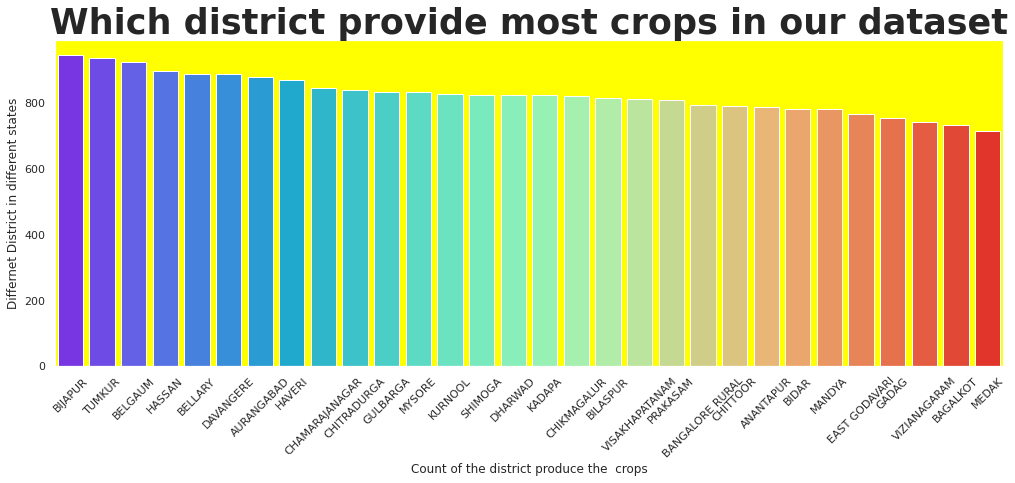

In [7]:
# to visualization the which district produce the most crops
dist=data['District_Name'].value_counts()[:30]
ax=plt.axes()
ax.set(facecolor='yellow')
sns.set(rc={'figure.figsize':(15,9)},style='dark')
ax.set_title("Which district provide most crops in our dataset",fontsize=35,fontweight='bold')
sns.barplot(x=dist.index,y=dist,palette='rainbow')
plt.xlabel("Count of the district produce the  crops")
plt.ylabel("Differnet District in different states")
plt.xticks(rotation=45)
plt.show()

# Observation:
1.From the above data Bijapur district is produce the more crops in year


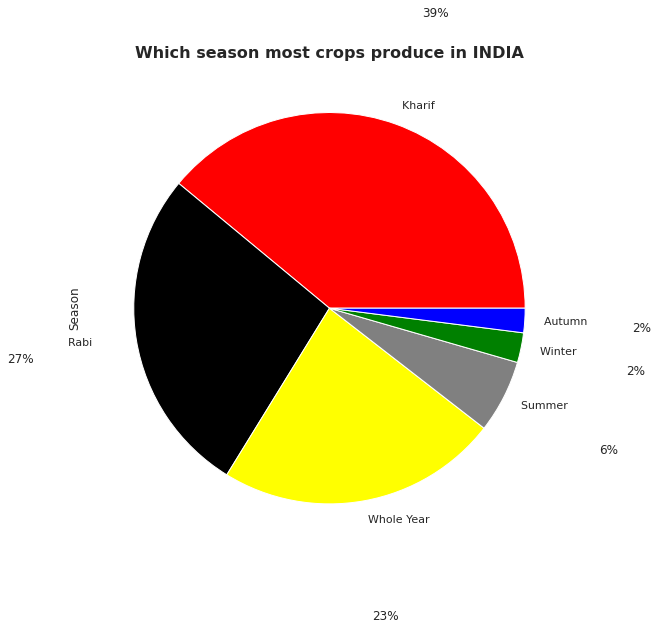

In [8]:

data['Season'].value_counts().plot(kind='pie',autopct='%1.0f%%',colors=['Red','Black','yellow','grey','green','blue'],labeldistance=1.1,pctdistance=1.6)
plt.title("Which season most crops produce in INDIA",fontsize=16,fontweight='bold')
plt.show()

# Observations
1.Most of the crops produced in kharif and Rabi seasons

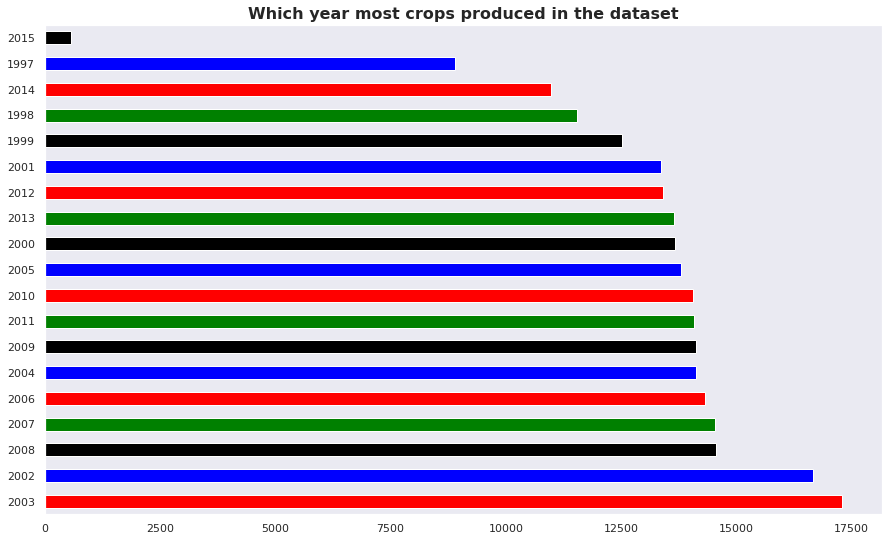

In [9]:
data['Crop_Year'].value_counts().plot(kind='barh',color=['red','blue','black','green'])
plt.title("Which year most crops produced in the dataset",fontsize=16,fontweight='bold')
plt.show()

# Observation:
1.In our data most of the crops produce in 2003

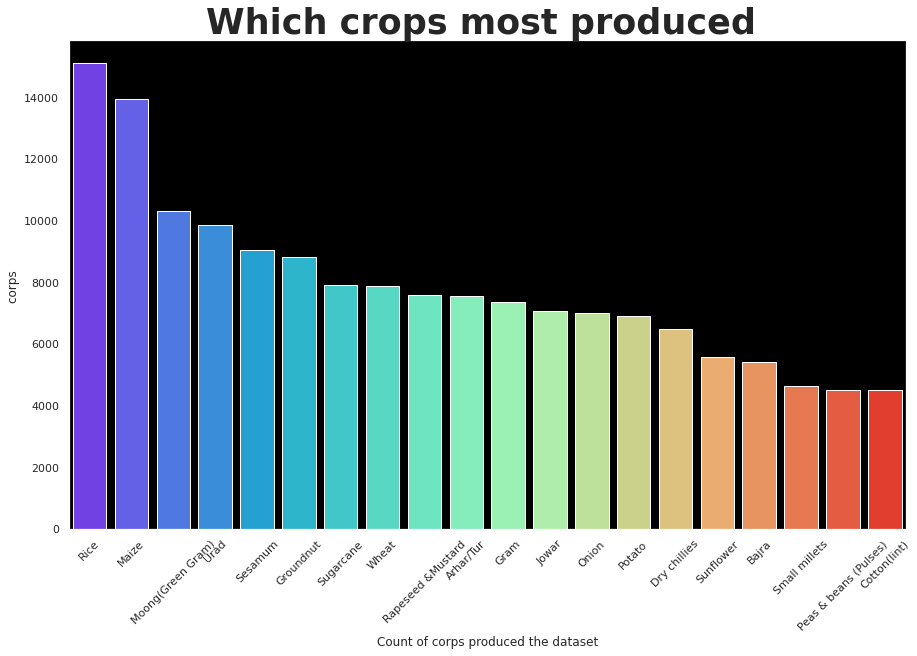

In [10]:
crop=data['Crop'].value_counts()[:20]
ax=plt.axes()
ax.set(facecolor='black')
sns.set(rc={'figure.figsize':(15,9)},style='dark')
ax.set_title("Which crops most produced ",fontsize=35,fontweight='bold')
sns.barplot(x=crop.index,y=crop,palette='rainbow',)
plt.xlabel("Count of corps produced the dataset")
plt.ylabel("corps ")
plt.xticks(rotation=45)
plt.show()

# Observation:
1.From the majority of the crop produce in the india is Rice after that maize,moong

In [11]:
state_season=data.groupby(['State_Name','Season']).size().reset_index().rename(columns={0:'state_name_seasons'})
state_season=state_season.sort_values(by='state_name_seasons',ascending=False)
state_season.head()

,State_Name,Season,state_name_seasons
118,Uttar Pradesh,Kharif,14538
119,Uttar Pradesh,Rabi,12003
62,Madhya Pradesh,Kharif,9267
111,Tamil Nadu,Whole Year,8117
64,Madhya Pradesh,Whole Year,8116


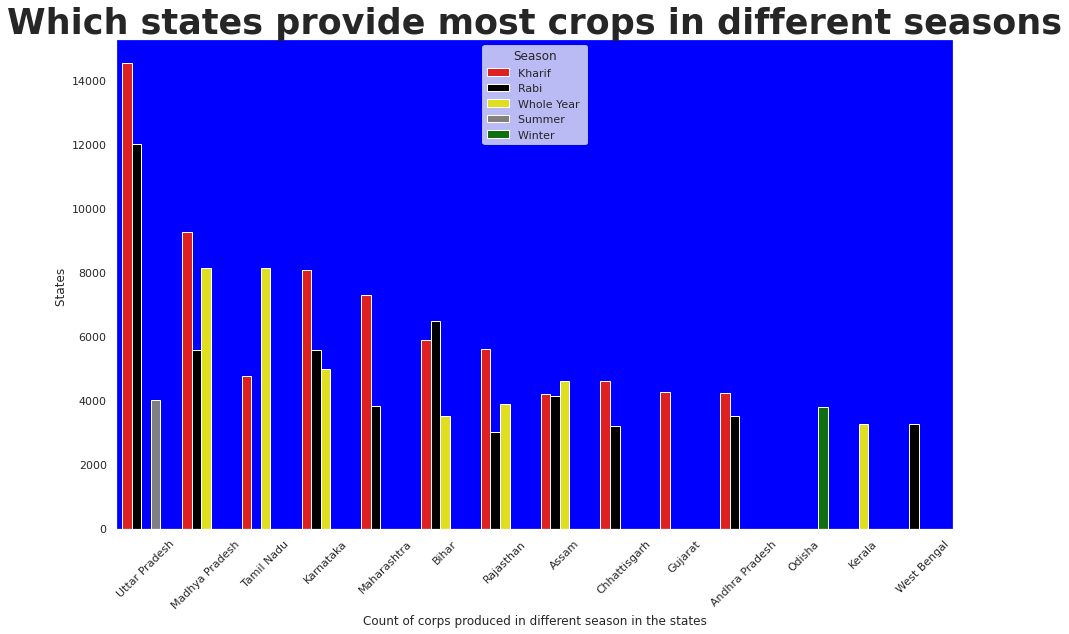

In [12]:
ax=plt.axes()
ax.set(facecolor='blue')
sns.set(rc={'figure.figsize':(15,9)},style='dark')
ax.set_title("Which states provide most crops in different seasons",fontsize=35,fontweight='bold')
sns.barplot(x='State_Name',y='state_name_seasons',hue='Season',data=state_season[:30],palette=['Red','Black','yellow','grey','green','maroon'])
plt.xlabel("Count of corps produced in different season in the states")
plt.ylabel("States ")
plt.xticks(rotation=45)
plt.show()

# observation:
1.In top 30 observations the state Utter Pradesh produce the most crop production in Rabi season and Kharif and madhya pradesh produced the crops in Rabi and Khrif
2.In Andhra pradesh produce the most crop in Khrif seasons


In [13]:
season_crop=data.groupby(['Crop','Production']).size().reset_index().rename(columns={0:'season_crop_production'})
season_crop=season_crop.sort_values(by='season_crop_production',ascending=False)
season_crop.head()

,Crop,Production,season_crop_production
98106,Sesamum,100,399
57446,Moong(Green Gram),1,304
69399,Other Vegetables,0,286
67935,Other Fresh Fruits,0,257
30900,Groundnut,100,240


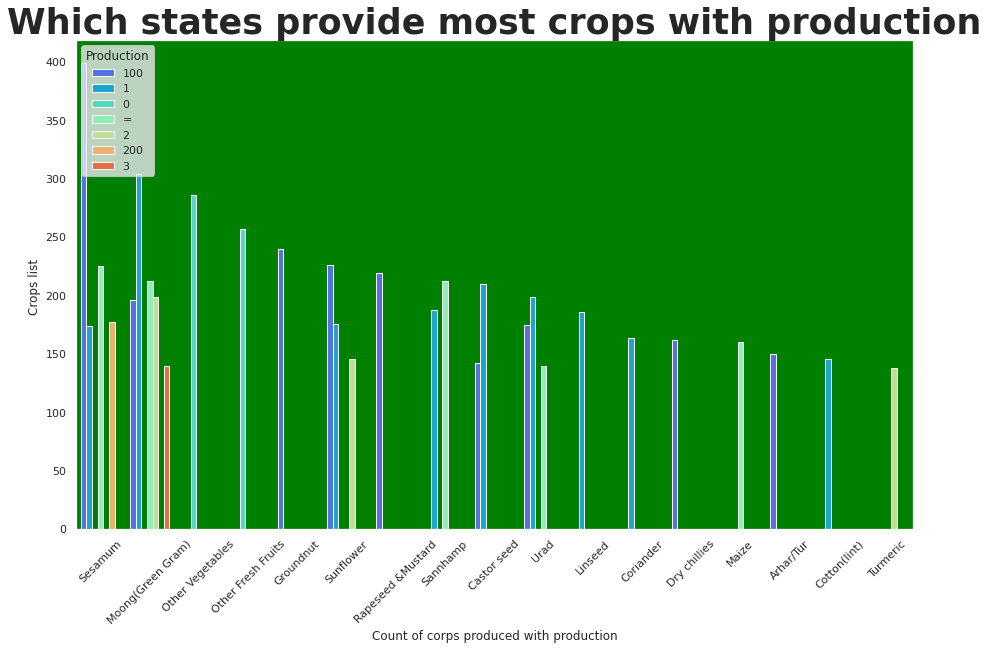

In [14]:
ax=plt.axes()
ax.set(facecolor='green')
sns.set(rc={'figure.figsize':(22,9)},style='dark')
ax.set_title("Which states provide most crops with production",fontsize=35,fontweight='bold')
sns.barplot(x='Crop',y='season_crop_production',hue='Production',data=season_crop[:30],palette='rainbow')
plt.xlabel("Count of corps produced with production")
plt.ylabel("Crops list ")
plt.xticks(rotation=45)
plt.show()

In [15]:
dist_crops=data.groupby(['District_Name','Crop']).size().reset_index().rename(columns={0:'dist_with_crops'})
dist_crops=dist_crops.sort_values(by='dist_with_crops',ascending=False)
dist_crops.head()

,District_Name,Crop,dist_with_crops
1148,AURANGABAD,Maize,94
3170,BIJAPUR,Maize,63
17424,SAHARSA,Maize,54
13297,MARIGAON,Rice,54
4321,CHITRADURGA,Rice,54


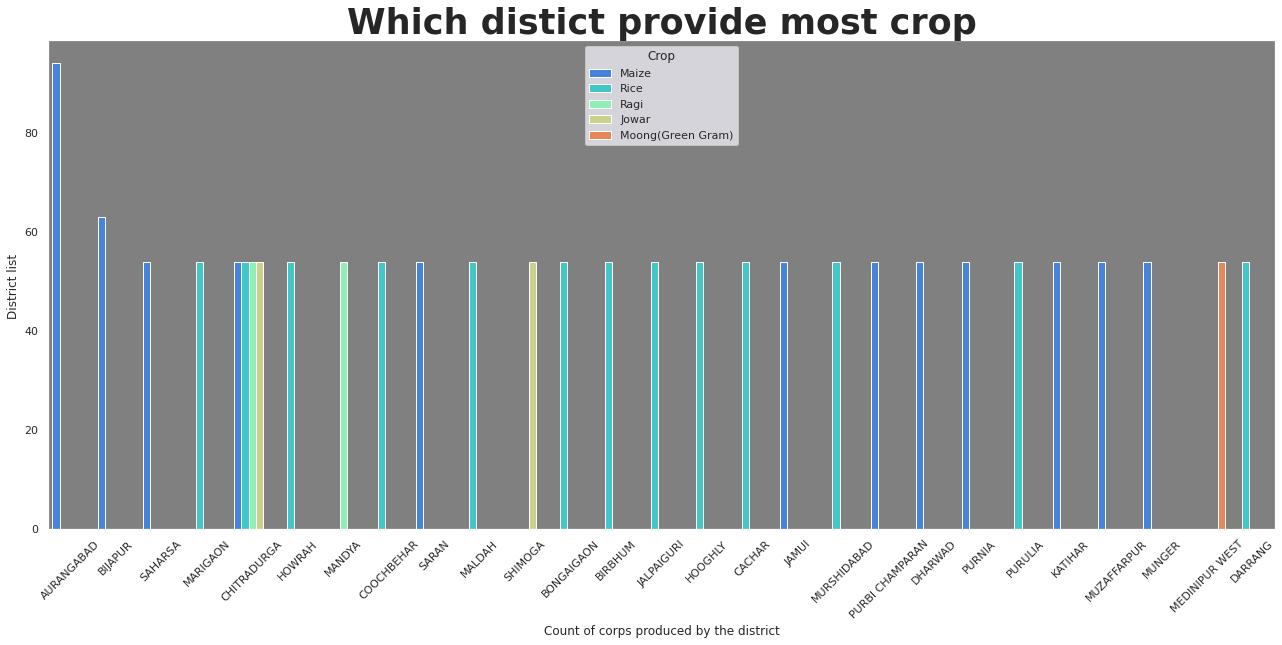

In [16]:
ax=plt.axes()
ax.set(facecolor='grey')
sns.set(rc={'figure.figsize':(18,9)},style='dark')
ax.set_title("Which distict provide most crop",fontsize=35,fontweight='bold')
sns.barplot(x='District_Name',y='dist_with_crops',hue='Crop',data=dist_crops[:30],palette='rainbow')
plt.xlabel("Count of corps produced by the district")
plt.xticks(rotation=45)
plt.ylabel("District list ")
plt.show()

# Observation:
1.Aurangabad district produce the production on maize crops

In [17]:
crop_area=data.groupby(['Crop','Area']).size().reset_index().rename(columns={0:'crop_area_production'})
crop_area=crop_area.sort_values(by=['crop_area_production','Area'],ascending=False)
crop_area.head()

,Crop,Area,crop_area_production
108482,Turmeric,1.0,289
45456,Maize,1.0,212
92513,Sesamum,100.0,200
30520,Groundnut,100.0,198
103517,Sunflower,1.0,186


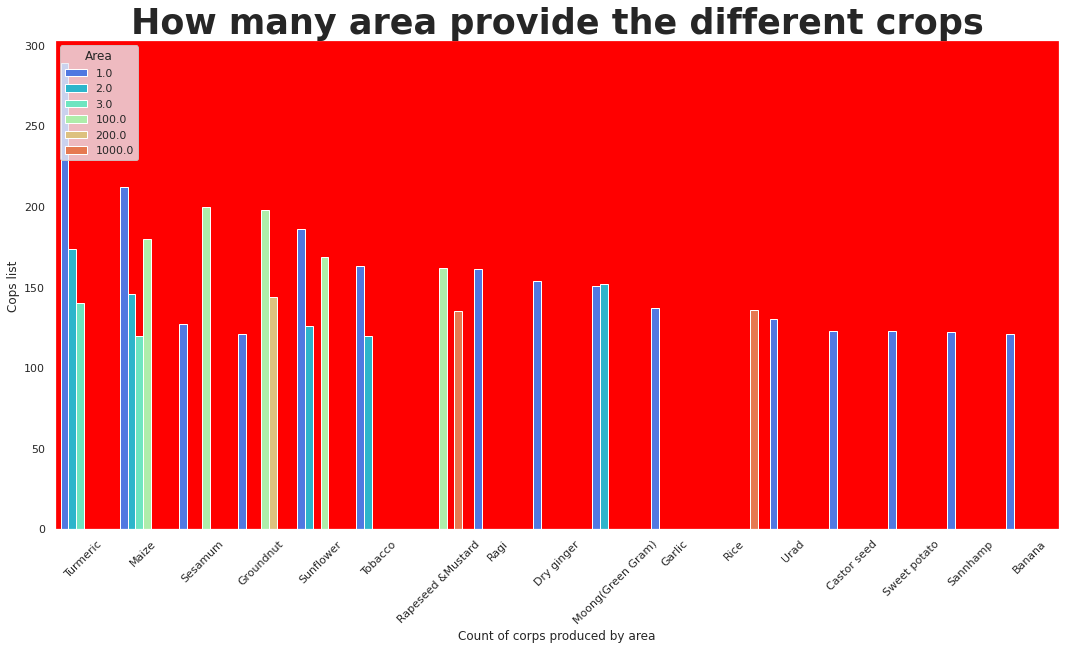

In [18]:
ax=plt.axes()
ax.set(facecolor='red')
sns.set(rc={'figure.figsize':(16,5)},style='dark')
ax.set_title("How many area provide the different crops",fontsize=35,fontweight='bold')
sns.barplot(x='Crop',y='crop_area_production',hue='Area',data=crop_area[:30],palette='rainbow')
plt.xlabel("Count of corps produced by area")
plt.ylabel("Cops list ")
plt.xticks(rotation=45)
plt.show()

In [19]:
data.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

# Observation :
1) From the above data turmaric produce the most of the area 1.0
2).The Rice is produced the area in more then 1000.0

In [20]:
tabel=pd.pivot_table(data,index=['State_Name','Crop_Year'],values='Crop',aggfunc='count').sort_values(by='Crop',ascending=False)
tabel=tabel.head(20)
tabel.head()

Crop
State_Name    Crop_Year      
Uttar Pradesh 2013       2174
              2011       2147
              2012       2147
              2014       2136
              2009       2119

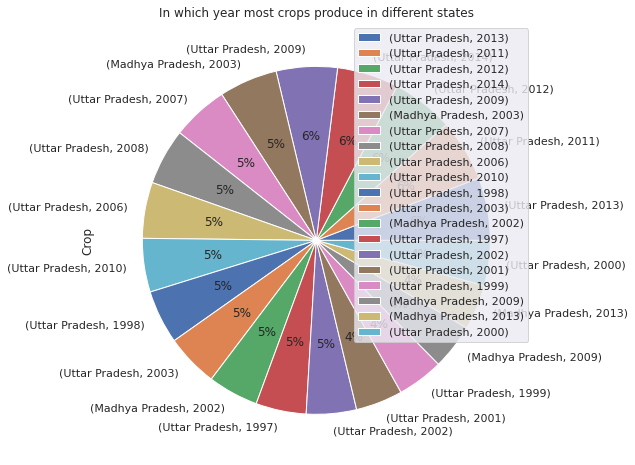

In [21]:
tabel.plot(kind='pie',subplots=True,figsize=(18,8),autopct='%1.0f%%')
plt.title("In which year most crops produce in different states")
plt.show()

In [22]:
dataframe=pd.pivot_table(data,index=['District_Name','Crop_Year', 'Season'],values=['Crop'],aggfunc='sum').sort_values(by='Crop',ascending=False)
dataframe.head()

Crop
District_Name Crop_Year Season                     
SERCHHIP      2007      Rabi         other oilseeds
PAPUM PARE    2009      Rabi                  Wheat
ANJAW         2011      Rabi                  Wheat
              2013      Rabi                  Wheat
ANUGUL        1997      Rabi                  Wheat

In [23]:
dist_crop_year=data[['District_Name','Crop','Crop_Year']].groupby(['District_Name','Crop','Crop_Year']).size().reset_index().rename(columns={0:'dist_crop_year'}).sort_values(by='dist_crop_year',ascending=False)
dist_crop_year.head()

,District_Name,Crop,Crop_Year,dist_crop_year
10661,AURANGABAD,Maize,2014,6
15546,BALRAMPUR,Maize,2013,6
10659,AURANGABAD,Maize,2012,6
10654,AURANGABAD,Maize,2007,6
10653,AURANGABAD,Maize,2006,6


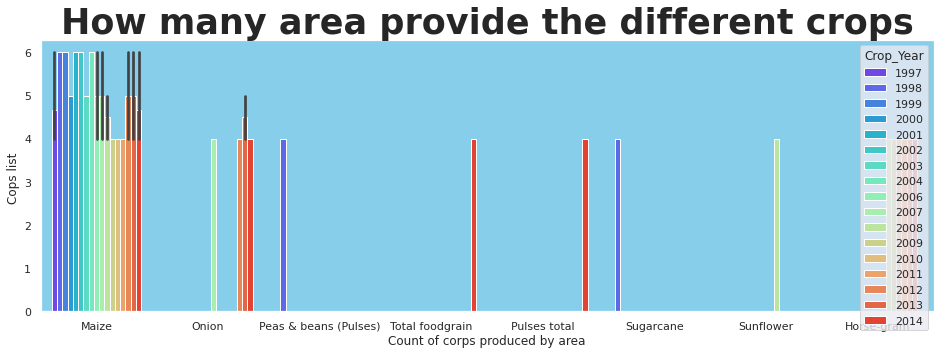

In [24]:
ax=plt.axes()
ax.set(facecolor='skyblue')
sns.set(rc={'figure.figsize':(19,8)},style='dark')
ax.set_title("How many area provide the different crops",fontsize=35,fontweight='bold')
sns.barplot(x='Crop',y='dist_crop_year',hue='Crop_Year',data=dist_crop_year[:50],palette='rainbow')
plt.xlabel("Count of corps produced by area")
plt.ylabel("Cops list ")
plt.show()

In [25]:
crop_with_area=data[['Area','Crop','District_Name']].groupby(['Area','Crop','District_Name']).size().reset_index().rename(columns={0:'crop_with_area'}).sort_values(by='Area',ascending=False)
crop_with_area.head()

,Area,Crop,District_Name,crop_with_area
223201,8580100.0,Oilseeds total,NADIA,1
223200,5544000.0,Oilseeds total,MURSHIDABAD,1
223199,5251200.0,Oilseeds total,MEDINIPUR WEST,1
223198,4307200.0,Pulses total,MURSHIDABAD,1
223197,4205800.0,Oilseeds total,24 PARAGANAS NORTH,1


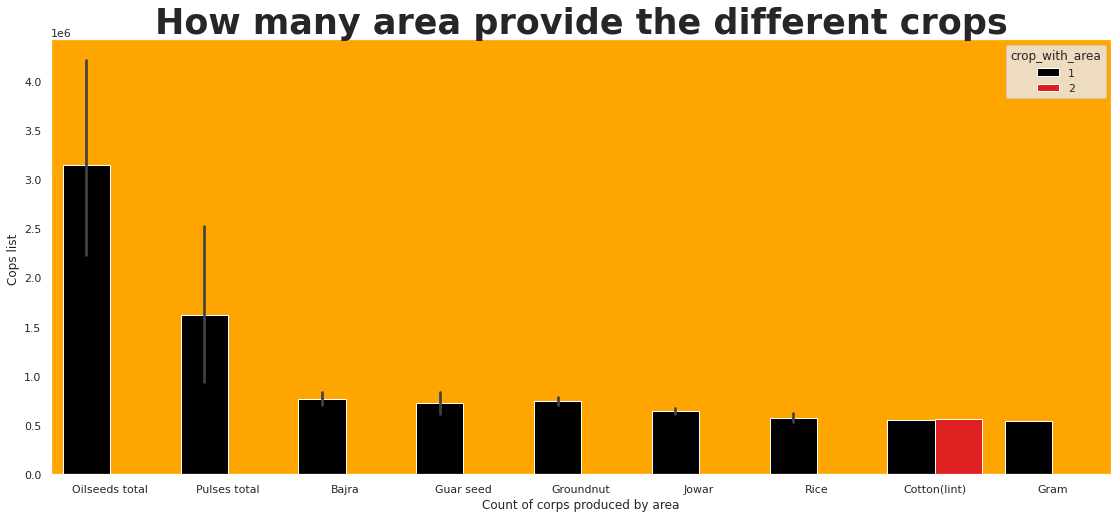

In [26]:
ax=plt.axes()
ax.set(facecolor='orange')
sns.set(rc={'figure.figsize':(19,8)},style='dark')
ax.set_title("How many area provide the different crops",fontsize=35,fontweight='bold')
sns.barplot(x='Crop',y='Area',hue='crop_with_area',data=crop_with_area[:100],palette=['black','red'])
plt.xlabel("Count of corps produced by area")
plt.ylabel("Cops list ")
plt.show()

In [27]:
#convert the categorical to numerical data using labelencoder
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
data['State_Name']=label.fit_transform(data['State_Name'])
data['District_Name']=label.fit_transform(data['District_Name'])
data['Season']=label.fit_transform(data['Season'])
data['Crop']=label.fit_transform(data['Crop'])


In [28]:
#Data clean preprocessing
data.replace('=',0,inplace=True)
data['Production']=data['Production'].astype(float)

# KMean Clustering

In [29]:
from sklearn.cluster import KMeans
from kneed import KneeLocator


In [30]:
#intialize the kmeans cluster algoritham
kmeans = KMeans(
     init="random",    n_clusters=3,    n_init=10,
     max_iter=300,    random_state=42 )

In [31]:
#fit the model to kmeans algoritham
kmeans.fit(data)

KMeans(init='random', n_clusters=3, random_state=42)

In [32]:
kmeans.inertia_

5.277858221344307e+18

In [33]:
kmeans.cluster_centers_

array([[1.40303030e+01, 3.99454545e+02, 2.00652525e+03, 4.00000000e+00,
        2.80000000e+01, 8.87864928e+04, 7.16899915e+08],
       [1.73551124e+01, 3.11459056e+02, 2.00564223e+03, 2.16806107e+00,
        6.84699894e+01, 1.19530290e+04, 1.09587559e+05],
       [1.40697674e+01, 3.26728682e+02, 2.00646512e+03, 4.00000000e+00,
        2.80000000e+01, 4.79747704e+04, 3.35344955e+08]])

In [34]:
 kmeans_kwargs = {
   ...:     "init": "random",
   ...:     "n_init": 10,
   ...:     "max_iter": 20,
   ...:     "random_state": 42,
   ...: }
   ...:
   ...: # A list holds the SSE values for each k
   ...: sse = []
   ...: for k in range(1, 11):
   ...:     kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
   ...:     kmeans.fit(data)
   ...:     sse.append(kmeans.inertia_)

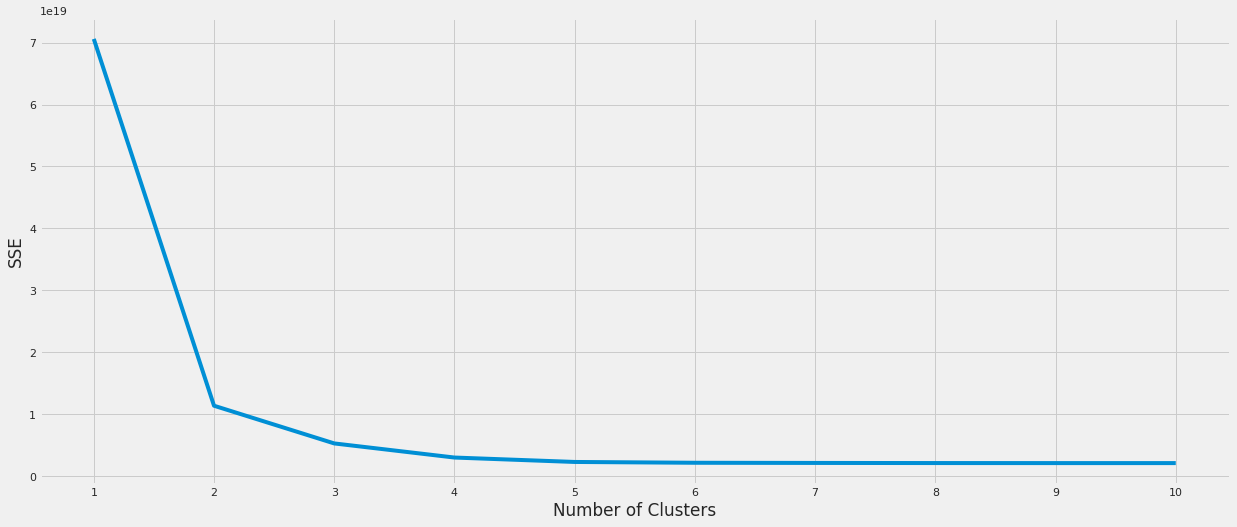

In [35]:
#plot lbow method
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [36]:
kl = KneeLocator(
   ...:     range(1, 11), sse, curve="convex", direction="decreasing"
   ...: )
kl.elbow

2

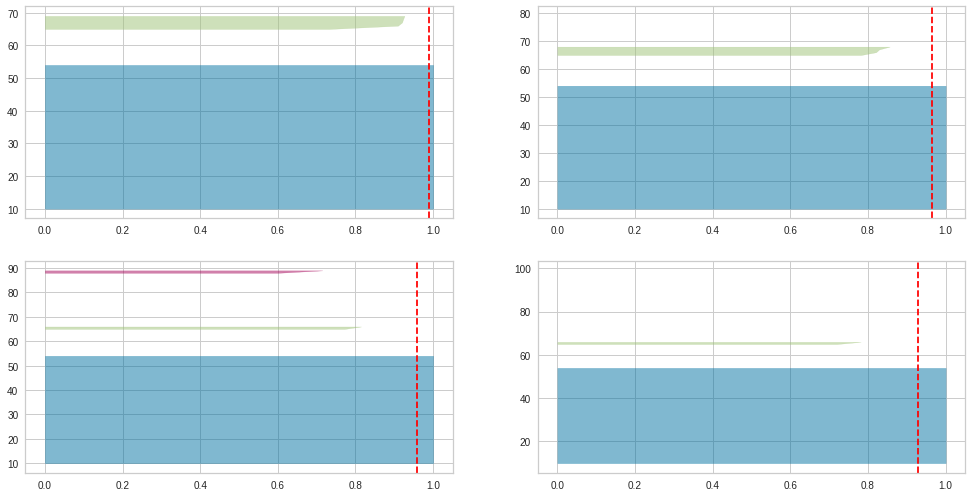

In [37]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))

#iterate from range 2 to 5
for i in [ 2, 3, 4, 5]:
    km =KMeans(n_clusters=i,max_iter=10,n_init=10,random_state=1)
    q, mod = divmod(i, 2)
    visualizer =SilhouetteVisualizer(estimator=km,ax=ax[q-1][mod], colors='yellowbrick')
    visualizer.fit(data[:50])

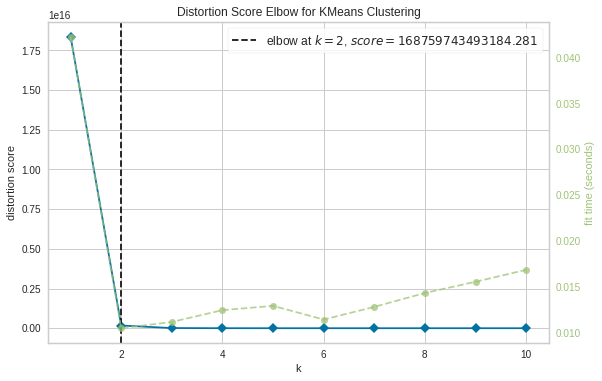

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [38]:
from yellowbrick.cluster import KElbowVisualizer
model=KMeans(n_clusters=range(1,11),max_iter=50,random_state=42)
elbow = KElbowVisualizer(model,k=range(1,11))
elbow.fit(data[:50])
elbow.show()

In [39]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
from sklearn.metrics.pairwise import euclidean_distances


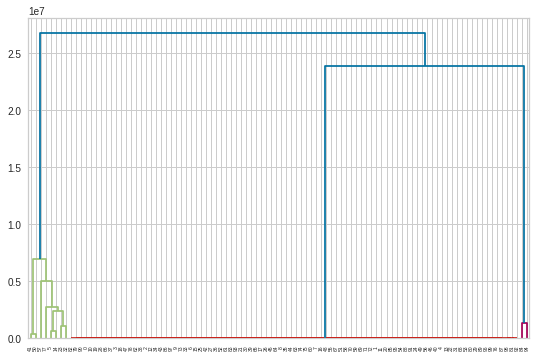

In [40]:
mergings =linkage(data[:100],method='single',metric='euclidean')
fig = figsize=(30, 10)
fig=dendrogram(mergings)

In [41]:
from sklearn.cluster import Birch
model=Birch(threshold=1.5, branching_factor=30, n_clusters=None)
model.fit(data[:500])

Birch(branching_factor=30, n_clusters=None, threshold=1.5)

In [42]:
pred=model.predict(data[:500])

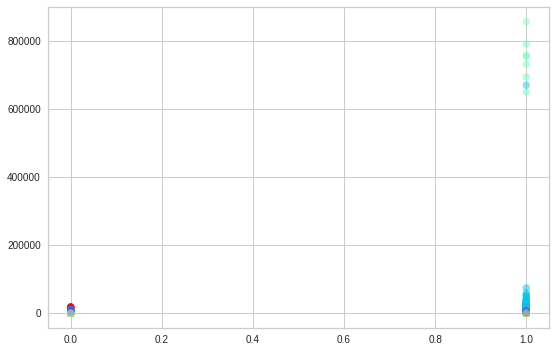

In [43]:
plt.scatter(data.iloc[:,:1][:500],data['Area'][:500],c=pred,cmap='rainbow',alpha=0.5)

In [44]:
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
import sklearn.cluster as cluster

In [45]:
data.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [46]:
y_pred=km.fit_predict(data[['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Area',
       'Production']])

In [47]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

<AxesSubplot:xlabel='Crop_Year', ylabel='Crop'>

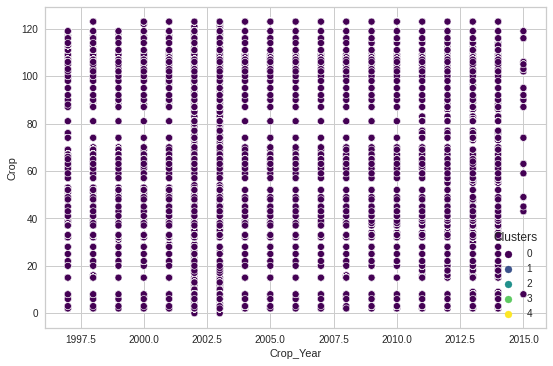

In [48]:
data['Clusters'] = km.labels_
sns.scatterplot(x='Crop_Year', y='Crop',hue = 'Clusters',  data=data,palette='viridis')


In [49]:
K=range(2,12)
wss = []
for k in K:
    kmeans=cluster.KMeans(n_clusters=k)
    kmeans=kmeans.fit(data)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

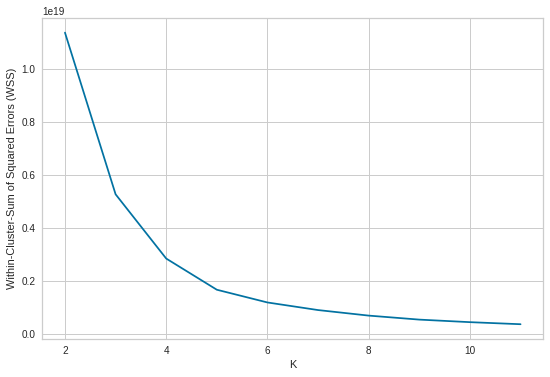

In [50]:
plt.xlabel('K')
plt.ylabel('Within-Cluster-Sum of Squared Errors (WSS)')
plt.plot(K,wss)

In [51]:
import sklearn.cluster as cluster
import sklearn.metrics as metrics
for i in range(2,12):
    labels=cluster.KMeans(n_clusters=i,random_state=200).fit(data).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(data,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 2 is 0.9971723908388735
Silhouette score for k(clusters) = 3 is 0.9971723908388735
Silhouette score for k(clusters) = 4 is 0.9971723908388735
Silhouette score for k(clusters) = 5 is 0.9925622700771973
Silhouette score for k(clusters) = 6 is 0.9962385650048818
Silhouette score for k(clusters) = 7 is 0.9962385650048818
Silhouette score for k(clusters) = 8 is 0.9962385650048818
Silhouette score for k(clusters) = 9 is 0.9962385650048818
Silhouette score for k(clusters) = 10 is 0.9962385650048818
Silhouette score for k(clusters) = 11 is 0.9962385650048818


In [52]:
kmeans = cluster.KMeans(n_clusters=5)
kmeans = kmeans.fit(data)

<AxesSubplot:xlabel='Crop_Year', ylabel='Crop'>

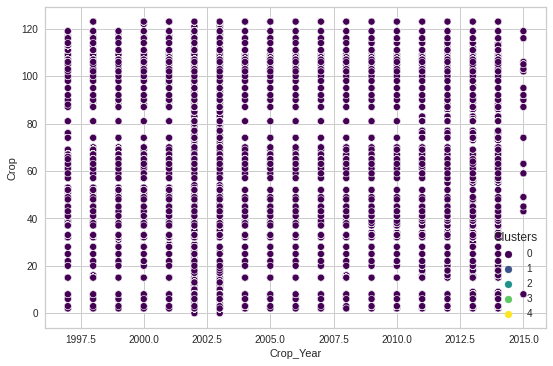

In [53]:

data['Clusters'] = kmeans.labels_

sns.scatterplot(x='Crop_Year', y='Crop',hue = 'Clusters',  data=data,palette='viridis')

In [54]:
K=range(5,12)
wss = []
for k in K:
    kmeans=cluster.KMeans(n_clusters=k)
    kmeans=kmeans.fit(data)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

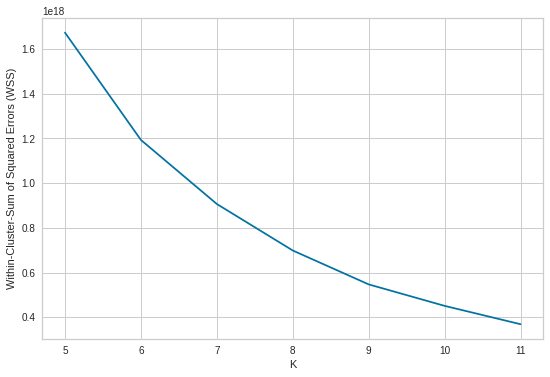

In [55]:
plt.xlabel('K')
plt.ylabel('Within-Cluster-Sum of Squared Errors (WSS)')
plt.plot(K,wss)

In [56]:
for i in range(5,12):
    labels=cluster.KMeans(n_clusters=i,random_state=200).fit(data).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(data,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 5 is 0.9925622700771973
Silhouette score for k(clusters) = 6 is 0.9962385650048818
Silhouette score for k(clusters) = 7 is 0.9962385650048818
Silhouette score for k(clusters) = 8 is 0.9962385650048818
Silhouette score for k(clusters) = 9 is 0.9962385650048818
Silhouette score for k(clusters) = 10 is 0.9962385650048818
Silhouette score for k(clusters) = 11 is 0.9962385650048818


# Conclusion
Finaly we get the accuracy score 99% so our model is good

# Thanks 